In [1]:
!pip install opencv-python

* opencv library is used to do some image processing

In [2]:
from random import randint

import cv2
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.preprocessing.image import ImageDataGenerator

* ImageDataGenerator is a tensorflow object that allows us to preprocess and work with image data

In [4]:
cifar_10 = tf.keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = cifar_10.load_data()

* cifar-10 is available as a built in datasets in keras. It is available at tf.keras.datasets.cifar10

* CIFAR-10 is a labeled subset of the 80 million tiny images dataset commonly use for image processing operations. This contains a total of 60000 images in 10 classes

* 50000 images makeup for training the data and the remaining 10000 make up for testing the data

In [5]:
train_images.shape, test_images.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

* each image is a 32x32 pixel images in our dataset and has 3 channels this is an RGB image or a color image i.e Red, Green and Blue

In [6]:
train_images[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

* if you observe above values in the matrices they are RGB values for images in the range of 0 to 255

In [7]:
train_labels[:20]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3],
       [4],
       [7],
       [7],
       [2],
       [9],
       [9],
       [9],
       [3],
       [2],
       [6]], dtype=uint8)

* The labels are numeric values from 0 to 9 to reprasenting 10 classes each numeric value correspond the differen image class

In [8]:
lookup = ['Airplane',
         'Automobile',
         'Bird',
         'Cat',
         'Deer',
         'Dog',
         'Frog',
         'Horse',
         'Ship',
         'Truck'
         ]

In [9]:
def show_img(images, labels, n_images):
    
    random_int = randint(0, labels.shape[0] - n_images)
    
    imgs, labels = images[random_int : random_int + n_images],\
        labels[random_int: random_int + n_images]
    
    _, figs = plt.subplots(1, n_images, figsize = (n_images * 3, 3)) 
    
    
    for fig, img, label in zip(figs, imgs, labels):
        fig.imshow(img)
        ax = fig.axes
        
        
        ax.set_title(lookup[int(label)])
        ax.title.set_fontsize(20)
        
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

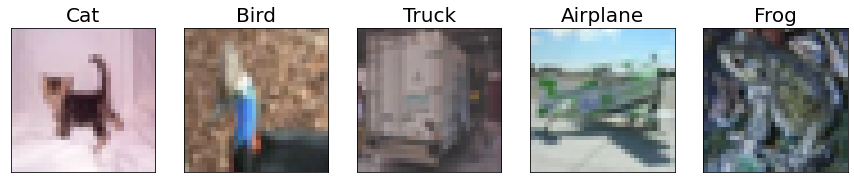

In [10]:
show_img(train_images, train_labels, 5)

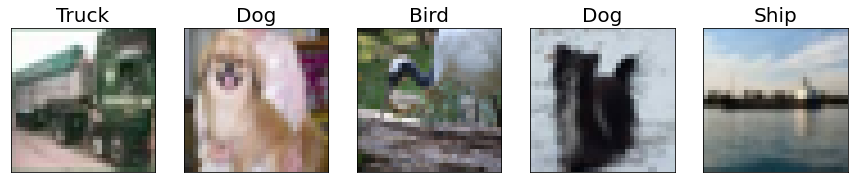

In [11]:
show_img(train_images, train_labels, 5)

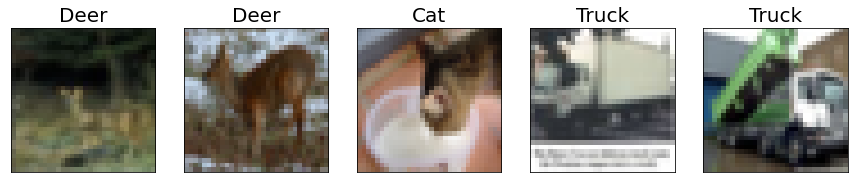

In [12]:
show_img(train_images, train_labels, 5)

In [56]:
train_dir = 'C:/Users/G ANIL/Neural Networks/Neural Networks Janani Ravi/Part II/datasets/train/'

test_dir =  'C:/Users/G ANIL/Neural Networks/Neural Networks Janani Ravi/Part II/datasets/test/'

In [57]:
i = 0

for img, label in zip(train_images, train_labels):
    
    path = train_dir + str(lookup[int(label)])
    
    cv2.imwrite(os.path.join(path, str(i) + '.jpeg'), img)
    
    i += 1
    cv2.waitKey(0)

In [58]:
i = 0

for img, label in zip(test_images, test_labels):
    
    path = test_dir + str(lookup[int(label)])
    
    cv2.imwrite(os.path.join(path, str(i) + '.jpeg'), img)
    
    i += 1
    cv2.waitKey(0)

In [59]:
train_image_generator = ImageDataGenerator(rescale = 1./255)

test_image_generator = ImageDataGenerator(rescale = 1./255)

**ImageDataGenerator**:  Reads images from a source(file, dataframe, URL), decodes images into the proper grid format, converts them into floating point tensors, performs other processing on images

In [60]:
batch_size = 64

* in order to feed the data in my training data to machine learning model

In [61]:
train_data_gen = train_image_generator.flow_from_directory(batch_size = batch_size, 
                                                          directory = train_dir,
                                                          shuffle = True,
                                                          target_size = (32, 32))

Found 50000 images belonging to 10 classes.


In [62]:
test_data_gen = train_image_generator.flow_from_directory(batch_size = batch_size, 
                                                          directory = test_dir,
                                                          shuffle = True,
                                                          target_size = (32, 32))

Found 10000 images belonging to 10 classes.


In [63]:
sample_batch = next(train_data_gen)
sample_batch[0].shape

(64, 32, 32, 3)

In [66]:
conv_model = tf.keras.models.Sequential([
    
    layers.Conv2D(16, (3, 3), padding = 'same', activation = 'relu',
                  
                  input_shape = sample_batch[0].shape[1:]),
    
    layers.Conv2D(32, (3, 3), padding = 'same', activation = 'relu'),
    
    layers.MaxPooling2D(pool_size = (2, 2)),
    
    layers.Conv2D(64, (3, 3), padding = 'same', activation = 'relu'),
    layers.Conv2D(128, (3, 3), padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(pool_size = (2,2)),
    
    layers.Flatten(),
    
    layers.Dense(512, activation = 'relu'),
    layers.Dense(256, activation = 'relu'),
    layers.Dense(10, activation = 'softmax') 
])

In [68]:
conv_model.compile(optimizer = 'adam', loss = tf.keras.losses.CategoricalCrossentropy(), metrics = ['accuracy'])

**CategorcalCrossentropy**: The loss function choosen when labels > 2 (i.e Multi Class Classification) and when labels are One-Hot-Encoded (default encoding with the ImageDataGenerator)

In [71]:
# keras.utils.plot_model(conv_model, 'model_image_classification_shapes.png', show_shapes = True)

In [72]:
training_hist = conv_model.fit(train_data_gen, epochs = 10, steps_per_epoch = len(train_images) // batch_size,
                              validation_data = test_data_gen, 
                              validation_steps = len(test_images) // batch_size)

Epoch 1/10
781/781 [==============================] - 368s 471ms/step - loss: 1.3667 - accuracy: 0.5057 - val_loss: 1.0389 - val_accuracy: 0.6336
Epoch 2/10
781/781 [==============================] - 128s 164ms/step - loss: 0.8775 - accuracy: 0.6901 - val_loss: 0.8616 - val_accuracy: 0.6952
Epoch 3/10
781/781 [==============================] - 129s 165ms/step - loss: 0.6420 - accuracy: 0.7744 - val_loss: 0.7667 - val_accuracy: 0.7450
Epoch 4/10
781/781 [==============================] - 139s 178ms/step - loss: 0.4625 - accuracy: 0.8385 - val_loss: 0.7781 - val_accuracy: 0.7502
Epoch 5/10
781/781 [==============================] - 138s 176ms/step - loss: 0.3003 - accuracy: 0.8953 - val_loss: 0.8570 - val_accuracy: 0.7512
Epoch 6/10
781/781 [==============================] - 142s 182ms/step - loss: 0.1850 - accuracy: 0.9357 - val_loss: 1.0970 - val_accuracy: 0.7475
Epoch 7/10
781/781 [==============================] - 137s 175ms/step - loss: 0.1245 - accuracy: 0.9569 - val_loss: 1.2255 -

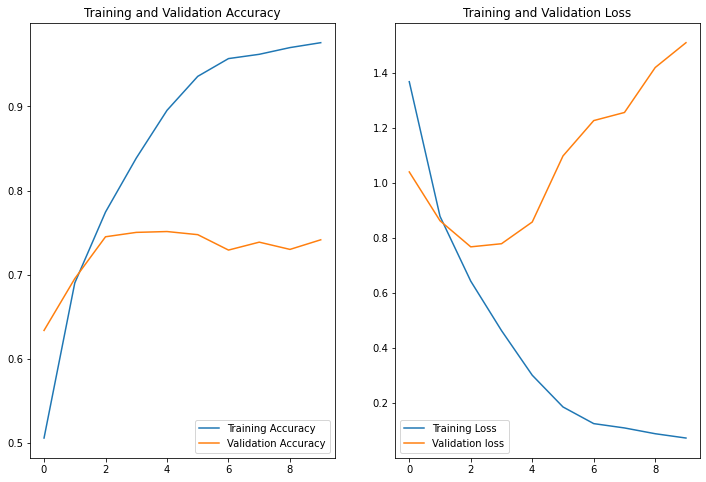

In [76]:
acc = training_hist.history['accuracy']
val_accu = training_hist.history['val_accuracy']

loss = training_hist.history['loss']
val_loss = training_hist.history['val_loss']

epochs_range = range(10)

plt.figure(figsize = (12,8))

plt.subplot(1, 2 , 1)

plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_accu, label = 'Validation Accuracy')

plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)

plt.plot(epochs_range, loss, label = "Training Loss")
plt.plot(epochs_range, val_loss, label = "Validation loss")

plt.legend(loc = 'lower left')

plt.title('Training and Validation Loss')

plt.show()

In [77]:
from tensorflow.keras.preprocessing import image

In [78]:
test_images[0].shape

(32, 32, 3)

In [79]:
def perform_test(model, img, label):
    
    plt.imshow(img)
    
    test_img = np.expand_dims(img, axis = 0)
    result = model.predict(test_img)
    
    print("Actual Label: ", lookup[int(label)])
    print("Predicted Label: ", lookup[np.argmax(result)])

* The above funtion is a helper funtion called perform_test in order to display the prediction results from our model.


* This takes an convolutional neural network that is our model a single image and the coresponding label we will then display the original image pass the image through our convolutional neural network to get the Classification result that is stored in the result variable


* we will then display actual label from our test data then predicted label for the test data

* The predicted label is category or class which has the highest probability score of our softmax layer

Actual Label:  Cat
Predicted Label:  Horse


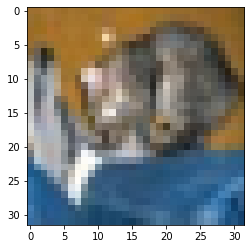

In [80]:
perform_test(conv_model, test_images[0], test_labels[0])

Actual Label:  Ship
Predicted Label:  Ship


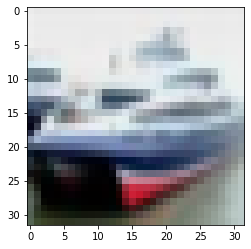

In [81]:
perform_test(conv_model, test_images[1], test_labels[1])

Actual Label:  Airplane
Predicted Label:  Airplane


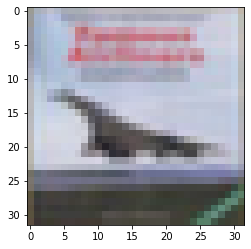

In [82]:
perform_test(conv_model, test_images[3], test_labels[3])

Found 50000 images belonging to 10 classes.


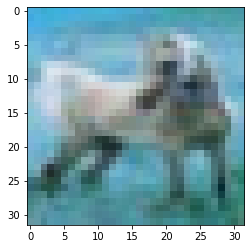

In [84]:
image_gen = ImageDataGenerator(rescale = 1./255, horizontal_flip = True)

train_data_gen = image_gen.flow_from_directory(batch_size = batch_size,
                                              directory = train_dir,
                                              shuffle = True,
                                              target_size = (32, 32))

plt.imshow(train_data_gen[0][0][0])

plt.show()

* we can improve our model so that it perform better on validation data, we want to make our model more robust


* One way to do this is pre-process our images that we feed in to our neural network we will add a random petabations to learn more from the data


* This is where the ImageDataGenerator working with images so simple. the above we rescale our images so that pixel value are between 0 and 1. and also we added horizontal flip to images

Found 50000 images belonging to 10 classes.


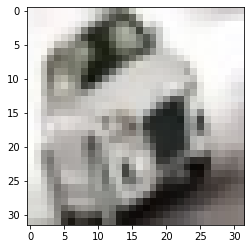

In [85]:
image_gen = ImageDataGenerator(rescale = 1./255, rotation_range = 60)

train_data_gen = image_gen.flow_from_directory(batch_size = batch_size,
                                              directory = train_dir,
                                              shuffle = True,
                                              target_size = (32, 32))

plt.imshow(train_data_gen[0][0][0])

plt.show()

**rotation_range**: It is one type of transformation by using this we can rotate the image how we want to see the image. This we should specify in ImageDataGenerator

Found 50000 images belonging to 10 classes.


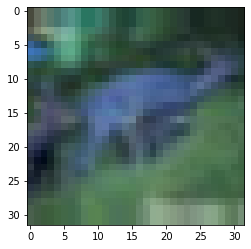

In [86]:
image_gen = ImageDataGenerator(rescale = 1./255, zoom_range = 0.5)

train_data_gen = image_gen.flow_from_directory(batch_size = batch_size,
                                              directory = train_dir,
                                              shuffle = True,
                                              target_size = (32, 32))

plt.imshow(train_data_gen[0][0][0])

plt.show()

**zoom_range** It is also one type of transformation by using this we can zoom the image, it wiil forces the CNN to do better and from that the model will learn more from input data(image).

Found 50000 images belonging to 10 classes.


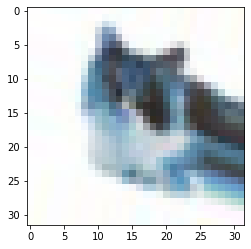

In [88]:
image_gen = ImageDataGenerator(

    rescale = 1./255,
    rotation_range = 30,
    width_shift_range = .05,
    height_shift_range = .05,
    horizontal_flip = True,
    zoom_range = 0.3
)

train_data_gen_aug = image_gen.flow_from_directory(batch_size = batch_size,
                                                  directory = train_dir,
                                                  shuffle = True,
                                                  target_size = (32, 32))

plt.imshow(train_data_gen_aug[0][0][0])

In [89]:
conv_model_with_dropout = tf.keras.models.Sequential([
    
    layers.Conv2D(16, (3, 3), padding = 'same', activation = 'relu',
                  
                  input_shape = sample_batch[0].shape[1:]),
    
    layers.Conv2D(32, (3, 3), padding = 'same', activation = 'relu'),
    
    layers.MaxPooling2D(pool_size = (2, 2)),
    
    layers.Conv2D(64, (3, 3), padding = 'same', activation = 'relu'),
    layers.Conv2D(128, (3, 3), padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(pool_size = (2,2)),
    
    layers.Dropout(0.10),
    
    layers.Flatten(),
    
    layers.Dense(512, activation = 'relu'),
    
    layers.Dropout(0.10),
    
    layers.Dense(256, activation = 'relu'),
    layers.Dense(10, activation = 'softmax') 
])

In [92]:
conv_model_with_dropout.compile(optimizer = 'adam', loss = tf.keras.losses.CategoricalCrossentropy(), metrics = ['accuracy'])

In [93]:
training_hist = conv_model_with_dropout.fit(train_data_gen, epochs = 10, steps_per_epoch = len(train_images) // batch_size,
                              validation_data = test_data_gen, 
                              validation_steps = len(test_images) // batch_size)

Epoch 1/10
781/781 [==============================] - 146s 187ms/step - loss: 1.6270 - accuracy: 0.4102 - val_loss: 1.2964 - val_accuracy: 0.5347
Epoch 2/10
781/781 [==============================] - 165s 212ms/step - loss: 1.2724 - accuracy: 0.5497 - val_loss: 1.0451 - val_accuracy: 0.6352
Epoch 3/10
781/781 [==============================] - 136s 174ms/step - loss: 1.1049 - accuracy: 0.6085 - val_loss: 0.9457 - val_accuracy: 0.6756
Epoch 4/10
781/781 [==============================] - 132s 169ms/step - loss: 0.9812 - accuracy: 0.6575 - val_loss: 0.8383 - val_accuracy: 0.7085
Epoch 5/10
781/781 [==============================] - 132s 169ms/step - loss: 0.8985 - accuracy: 0.6852 - val_loss: 0.8834 - val_accuracy: 0.6917
Epoch 6/10
781/781 [==============================] - 131s 168ms/step - loss: 0.8327 - accuracy: 0.7072 - val_loss: 0.7564 - val_accuracy: 0.7430
Epoch 7/10
781/781 [==============================] - 132s 169ms/step - loss: 0.7763 - accuracy: 0.7276 - val_loss: 0.7503 -

Actual Label:  Ship
Predicted Label:  Ship


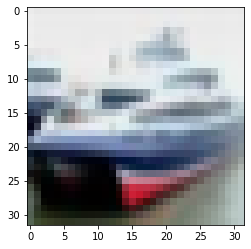

In [98]:
perform_test(conv_model_with_dropout, test_images[1], test_labels[1])

Actual Label:  Airplane
Predicted Label:  Ship


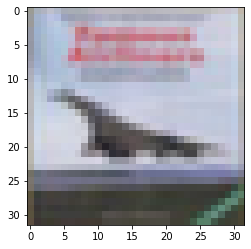

In [99]:
perform_test(conv_model_with_dropout, test_images[3], test_labels[3])

Actual Label:  Airplane
Predicted Label:  Cat


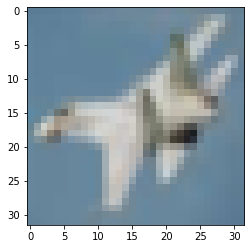

In [96]:
perform_test(conv_model_with_dropout, test_images[10], test_labels[10])

Actual Label:  Dog
Predicted Label:  Dog


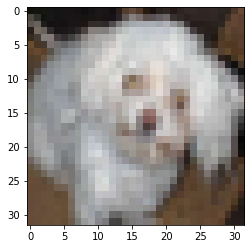

In [97]:
perform_test(conv_model_with_dropout, test_images[1000], test_labels[1000])

* If we try with more epochs the prediction will be more robust